In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

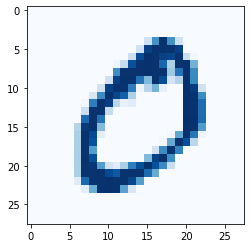

In [ ]:
plt.imshow(x_train[1], cmap = 'Blues')

In [ ]:
y_train.shape

(60000,)

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(x_train, y_train, epochs = 10,
          validation_data = (x_test,y_test),
          callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.5554 - accuracy: 0.8279 - val_loss: 0.2714 - val_accuracy: 0.9195 - lr: 1.0000e-04
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2028 - accuracy: 0.9396 - val_loss: 0.2044 - val_accuracy: 0.9372 - lr: 1.1220e-04
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1515 - accuracy: 0.9542 - val_loss: 0.1382 - val_accuracy: 0.9575 - lr: 1.2589e-04
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1263 - accuracy: 0.9621 - val_loss: 0.1373 - val_accuracy: 0.9593 - lr: 1.4125e-04
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1048 - accuracy: 0.9677 - val_loss: 0.1371 - val_accuracy: 0.9582 - lr: 1.5849e-04
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0922 - accuracy: 0.9720 - val_loss: 0.1069 - val_accuracy: 0.9673 - lr: 1.7783e-04
Epoch 7/10
1875/1875 [==========

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1325 - accuracy: 0.9598


[0.13246501982212067, 0.9598000049591064]

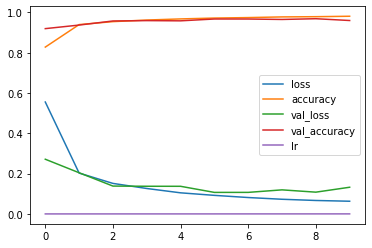

In [ ]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Finding the ideal learning rate')

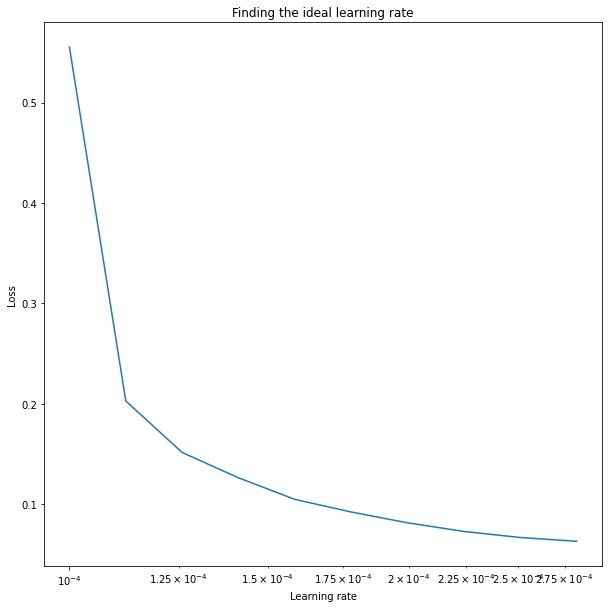

In [ ]:
plt.figure(figsize = (10,10))
lrs = 1e-4*(10**(np.arange(10)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
              metrics = ['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs = 10,
          validation_data = (x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7694 - accuracy: 0.7612 - val_loss: 0.3473 - val_accuracy: 0.9005
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2807 - accuracy: 0.9186 - val_loss: 0.2534 - val_accuracy: 0.9254
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2086 - accuracy: 0.9381 - val_loss: 0.1893 - val_accuracy: 0.9432
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1749 - accuracy: 0.9481 - val_loss: 0.1771 - val_accuracy: 0.9478
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1508 - accuracy: 0.9548 - val_loss: 0.1667 - val_accuracy: 0.9482
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9593 - val_loss: 0.1416 - val_accuracy: 0.9589
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1205 - accuracy: 0.9635 - val_loss: 0.1312 - val_accuracy:

In [ ]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1257 - accuracy: 0.9610


[0.1256665587425232, 0.9610000252723694]

In [ ]:
y_prob = model_2.predict(x_test)
y_prob

array([[4.2713550e-06, 1.0791451e-04, 1.5383112e-04, ..., 9.9775118e-01,
        5.0515217e-07, 1.6923746e-04],
       [2.8447030e-06, 1.4033830e-03, 9.9735707e-01, ..., 1.7584312e-05,
        3.5870591e-05, 2.4489299e-07],
       [1.1674885e-04, 9.9153894e-01, 3.6168902e-03, ..., 2.8157949e-03,
        2.1967600e-04, 1.7027828e-04],
       ...,
       [1.8027137e-07, 1.6056950e-08, 1.7384908e-05, ..., 4.5318516e-06,
        2.9612684e-07, 1.6242849e-04],
       [5.5967626e-09, 3.1509155e-09, 8.0850149e-10, ..., 6.6783135e-10,
        9.5005788e-07, 9.3537764e-09],
       [1.2633164e-08, 2.5597847e-11, 1.6517966e-07, ..., 6.6553967e-12,
        4.1288986e-09, 2.3463553e-13]], dtype=float32)

In [ ]:
y_prob[0].argmax()

7

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred[1]

2

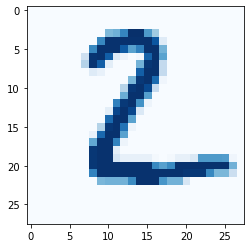

In [ ]:
plt.imshow(x_test[1], cmap = 'Blues')

In [ ]:
def probability(x):
  return np.round(y_prob[x].max()*100,2)

def actual(x):
  return class_names[y_test[x]]

def prediction(x):
  return class_names[y_pred[x]]

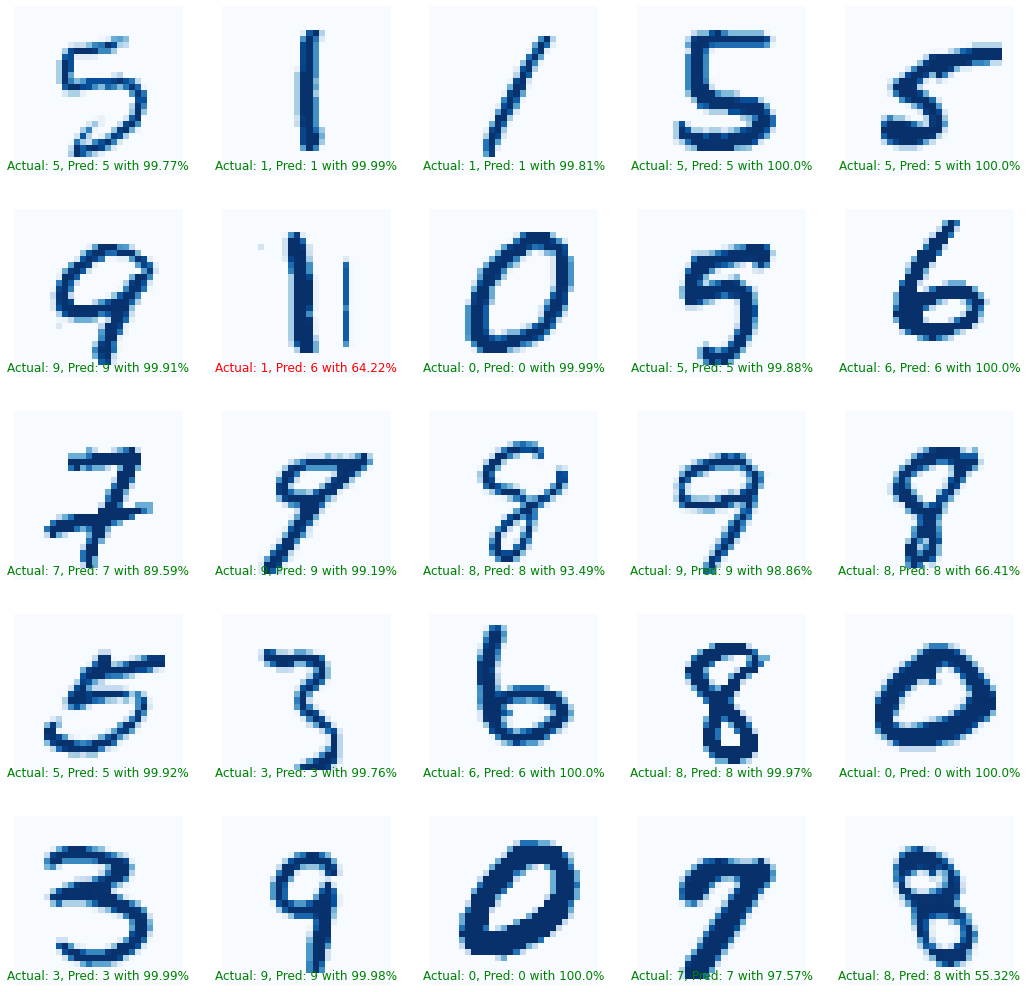

In [ ]:
plt.figure(figsize = (18,18))

for i in range (25):
  plt.subplot(5,5,i+1)
  rand_num = np.random.randint(0,len(x_test)-1)
  plt.imshow(x_test[rand_num], cmap = 'Blues')
  plt.title(f'Actual: {actual(rand_num)}, Pred: {prediction(rand_num)} with {probability(rand_num)}%',y = 0, color = 'green' if actual(rand_num) == prediction(rand_num) else 'red')
  plt.axis(False)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_true = y_test,
                      y_pred = y_pred)
cm

array([[ 967,    0,    1,    3,    1,    3,    3,    1,    1,    0],
       [   0, 1115,    3,    4,    0,    1,    4,    2,    6,    0],
       [   6,    1,  997,   12,    3,    1,    3,    4,    3,    2],
       [   0,    0,    3,  987,    0,    9,    0,    3,    5,    3],
       [   0,    0,    4,    0,  936,    1,   12,    1,    2,   26],
       [   5,    0,    0,    8,    1,  863,    8,    0,    4,    3],
       [   4,    2,    1,    1,    3,   15,  928,    0,    4,    0],
       [   0,    6,   18,    8,    7,    0,    0,  960,    3,   26],
       [   1,    0,    5,   27,    2,   27,    5,    2,  895,   10],
       [   4,    4,    1,   12,    9,    8,    1,    5,    3,  962]])

<Figure size 720x720 with 0 Axes>

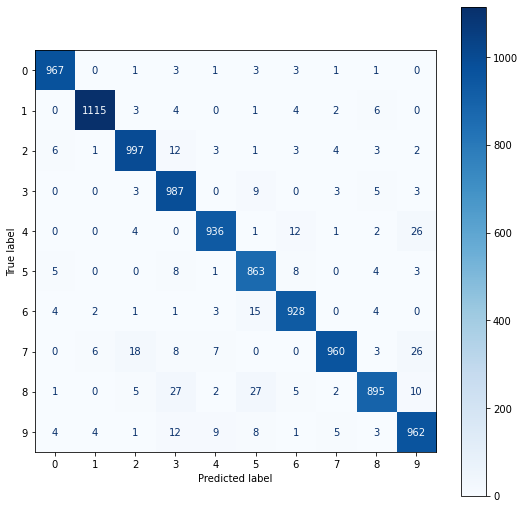

In [ ]:
plt.figure(figsize = (10,10))
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay(cm).plot(cmap = 'Blues',ax=ax)

In [ ]:
model_2.layers

In [ ]:
# Check the weights of the first hidden layer

weights, biases = model_2.layers[1].get_weights()
weights

array([[ 0.02711498, -0.00972034, -0.02424062, ..., -0.06670354,
        -0.06818554,  0.0205607 ],
       [-0.02133671,  0.002291  ,  0.02031962, ...,  0.0396647 ,
         0.02099904, -0.00442758],
       [ 0.05204089,  0.0794735 ,  0.04844743, ..., -0.03063007,
         0.04273382, -0.07629031],
       ...,
       [-0.06943287, -0.01702297,  0.06385626, ...,  0.06231274,
         0.04954486,  0.06814063],
       [-0.04320041,  0.00517786, -0.05265555, ..., -0.04418077,
         0.00621913, -0.0463354 ],
       [ 0.0026977 ,  0.0814071 ,  0.08104731, ...,  0.01354251,
         0.0667464 , -0.02558881]], dtype=float32)